## Imports

In [15]:
import  csv
import keras
import pandas as pd
from matplotlib import pyplot as plt

## Copy Rows to another File

In [2]:
def copy_lines_from_list(numbers, input_file, output_file):

  with open(input_file, 'r') as input_csv:

    with open(output_file, 'w') as output_csv:
      reader = csv.reader(input_csv)
      writer = csv.writer(output_csv)

      line_num = 0

      for row in reader:
        if line_num in numbers:
          writer.writerow(row)

        line_num += 1

In [4]:
copy_lines_from_list([1], './CSV_Manipulation/3_original.csv', './CSV_Manipulation/output.csv')

## Add value to specific row

In [5]:
def add_ten(number, csv_file):
  with open(csv_file, "r") as f:
    reader = csv.reader(f)
    rows = list(reader)

  row = rows[number]

  # add 10 to each value in the row
  #new_row = [int(value) + 10 for value in row]
  # add 10 to each value in the row if it is greater than 100
  new_row = [int(value) - 10 if int(value) > 100 else value for value in row]


  with open(csv_file, "a") as f:  # a for append w for overwrite
    writer = csv.writer(f)
    writer.writerow(new_row)

In [6]:
add_ten(0, "./CSV_Manipulation/output.csv")

## Invert Values

In [7]:
def add_invert(number, csv_file):
  with open(csv_file, "r") as f:
    reader = csv.reader(f)
    rows = list(reader)
  # get the row specified by the number
  row = rows[number]

  # invert the values in the row
  new_row = [(255 - int(value)) for value in row]

  # write the updated row back to the CSV file
  with open(csv_file, "a") as f:
    writer = csv.writer(f)
    writer.writerow(new_row)

In [10]:
add_invert(0, "./CSV_Manipulation/output.csv")

## Set Values to a specific Value

In [11]:
def set_value(number, csv_file, newValue):
  with open(csv_file, "r") as f:
    reader = csv.reader(f)
    rows = list(reader)

  # get the row specified by the number
  row = rows[number]

  # set the values in the row that are greater than 50 to the specified value
  new_row = [newValue if int(value) > 10 else value for value in row]


  # write the updated row to the CSV file in append mode
  with open(csv_file, "a") as f:
    writer = csv.writer(f)
    writer.writerow(new_row)

In [13]:
set_value(0, "./CSV_Manipulation/output.csv",255)

## Testing Special Cases

Data shape is: (21, 28, 28, 1)
1/1 [==============================] - 0s 152ms/step


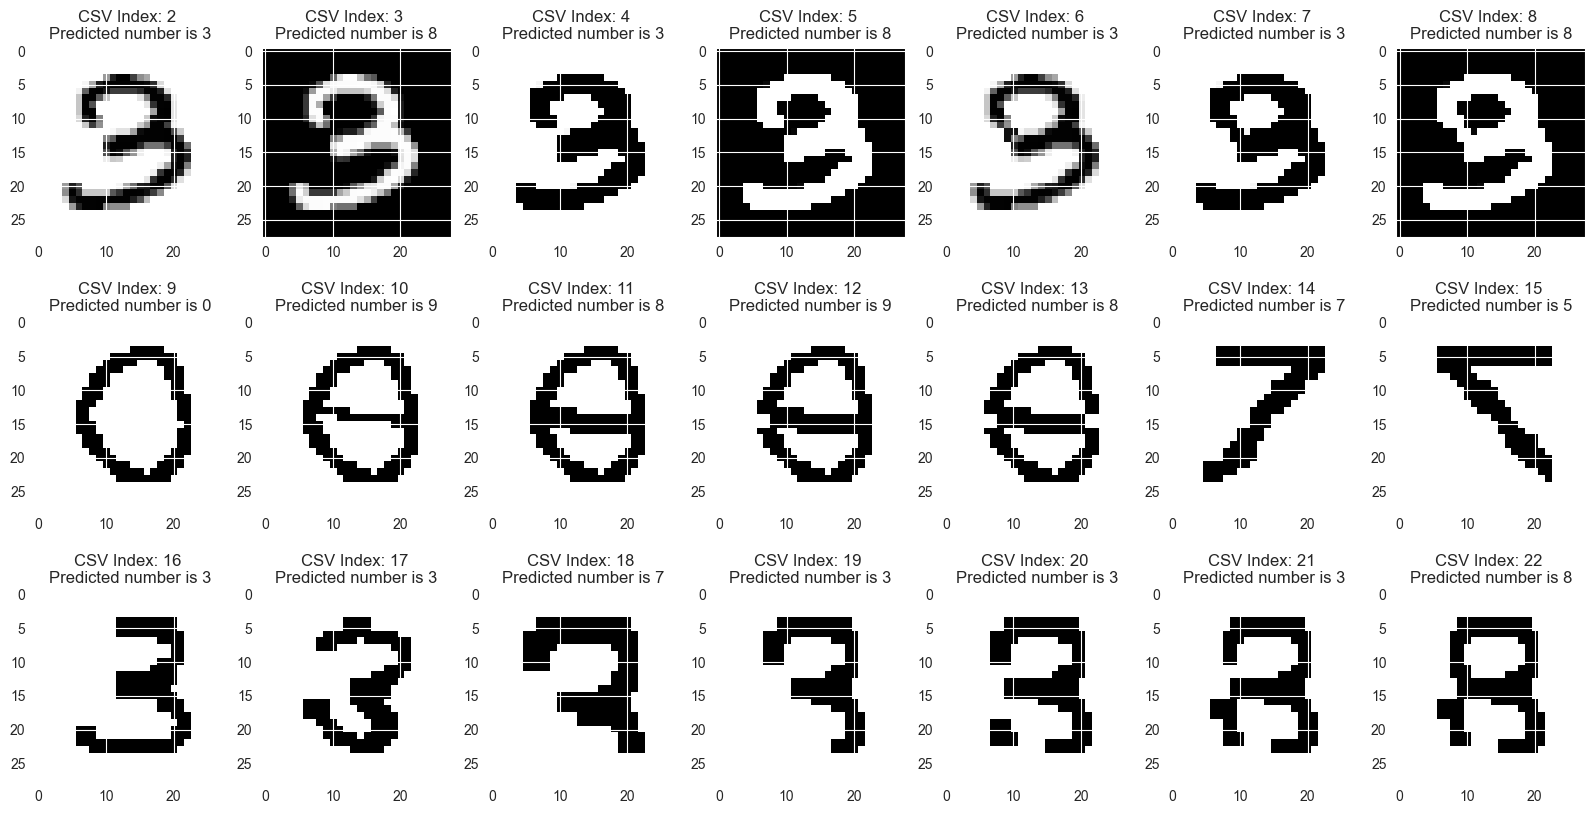

In [16]:
model = keras.models.load_model("./data/trained_models/name.h5")

file = './data/testManipulation.csv'
testimages = pd.read_csv(file)

x_testimage = testimages.values
x = x_testimage / 255.0

x = x.reshape(-1,28,28,1)

print(f'Data shape is: {x.shape}')

y_pred = model.predict(x)

fig, axis = plt.subplots(3, 7, figsize=(20, 10))

for i, ax in enumerate(axis.flat):
    ax.imshow(x[i], cmap='binary')
    ax.set(title = f"CSV Index: {i+2} \nPredicted number is {y_pred[i].argmax()}")

plt.show()